In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# S=100
# T=1
# r=0.07
# sigma=0.2
# Nsimulations=50000
# Nsteps=250
# K=100

In [3]:
# snp = pd.read_csv('data/BS_training.csv')
snp = pd.read_csv('data/SNP.csv')
snp= snp.dropna()
snp["Stock Price"] = snp["Stock Price"]/snp["Strike Price"]
snp["Call Price"] = snp["Call Price"]/snp["Strike Price"]
snp["Strike Price"] = snp["Strike Price"]/snp["Strike Price"]
snp.head()

,Stock Price,Strike Price,Maturity,Dividends,Volatility,Risk-free,Call Price
0,21.990000,1.0,0.005616,0.0275,0.3434,0.0088,22.600000
1,4.398000,1.0,0.005616,0.0275,0.3434,0.0088,2.420000
2,3.141429,1.0,0.005616,0.0275,0.3434,0.0088,1.571429
3,2.443333,1.0,0.005616,0.0275,0.3434,0.0088,1.233333
4,2.199000,1.0,0.005616,0.0275,0.3434,0.0088,1.260000


In [4]:
S=snp['Stock Price']
T=1
r=0.0088
sigma=snp['Volatility']
Nsimulations=snp.shape[0]
Nsteps=250
K=snp['Strike Price']

In [5]:
dt=T/Nsteps

In [6]:
import numpy as np

dt=T/Nsteps
drift = (r-(sigma**2)/2)*dt
a = sigma*np.sqrt(dt)
x=np.random.normal(0,1,(Nsimulations,Nsteps))

Smat=np.zeros((Nsimulations,Nsteps))
Smat[:,0]+=S

for i in range(1,Nsteps):
    Smat[:,i] += Smat[:,i-1] * np.exp(drift +a*x[:,i])

In [7]:
q=Smat[:,-1]-K
for i in range(len(q)):
    if q[i]<0:
        q[i]=0
    else:
        q[i]=q[i]

In [8]:
p=K-Smat[:,-1]
for i in range(len(p)):
    if p[i]<0:
        p[i]=0
    else:
        p[i]=p[i]

In [9]:
q

0        15.767120
1         0.952320
2         0.050645
3         2.185778
4         1.456830
           ...    
57511     0.301383
57512     0.375422
57513     0.000000
57514     0.000000
57515     0.000000
Name: Strike Price, Length: 57516, dtype: float64

Text(0.5, 1.0, 'Actual vs Predicted Call Price')

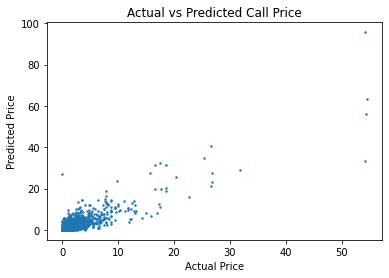

In [10]:
stock_actual = snp['Call Price']
stock_predict = q
plt.scatter(stock_actual,stock_predict,s=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Call Price')

In [11]:
p

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
57511    0.000000
57512    0.000000
57513    0.052438
57514    0.117344
57515    0.482209
Name: Strike Price, Length: 57516, dtype: float64

In [12]:
payoff_call=np.mean(q)
payoff_put=np.mean(p)

In [13]:
payoff_call

0.3462683468003086

In [14]:
payoff_put

0.13482876758816428

In [15]:
call=payoff_call*np.exp(-r*T)
put=payoff_put*np.exp(-r*T)

In [16]:
call

0.34323455361652794

In [17]:
put

0.13364747972322866

In [18]:
data = pd.read_csv('option_data/data.csv')

In [19]:
data

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,NIFTY,11-Feb-2019,04-Apr-2019,CE,12400,0.0,0.00,0.0,5.05,0.00,3.20,0,0.00,0.00,0,0,-
1,NIFTY,11-Feb-2019,04-Apr-2019,CE,9600,0.0,0.00,0.0,1447.70,0.00,1391.30,0,0.00,0.00,0,0,-
2,NIFTY,11-Feb-2019,04-Apr-2019,CE,12150,0.0,0.00,0.0,12.60,0.00,8.65,0,0.00,0.00,0,0,-
3,NIFTY,11-Feb-2019,04-Apr-2019,CE,12200,0.0,0.00,0.0,10.60,0.00,7.15,0,0.00,0.00,0,0,-
4,NIFTY,11-Feb-2019,04-Apr-2019,CE,12250,0.0,0.00,0.0,8.85,0.00,5.90,0,0.00,0.00,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41941,NIFTY,30-Aug-2021,02-Sep-2021,CE,15350,1420.8,1566.85,1420.8,1566.85,1566.85,1566.85,2,16.84,1.49,50,0,-
41942,NIFTY,30-Aug-2021,02-Sep-2021,CE,15100,0.0,0.00,0.0,1050.50,0.00,1835.60,0,0.00,0.00,0,0,-
41943,NIFTY,30-Aug-2021,02-Sep-2021,CE,15150,0.0,0.00,0.0,1018.95,0.00,1785.60,0,0.00,0.00,0,0,-
41944,NIFTY,30-Aug-2021,02-Sep-2021,CE,15200,0.0,0.00,0.0,1467.00,1467.00,1735.65,0,0.00,0.00,1700,0,-


In [20]:
data = data[data['Underlying Value'] != '-']

In [21]:
len(data)

24252

In [22]:
data.to_csv('optiondata.csv')

In [23]:
len(data)

24252